# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [17]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("Ok")


Ok


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [18]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].squeeze().shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)-min(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Some random plots and classes:


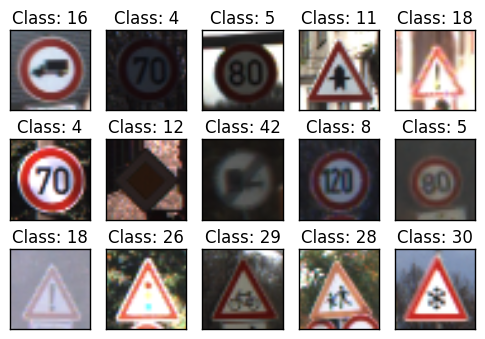

In [19]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

#Some random image 

print("Some random plots and classes:")

#plt.figure(figsize=(2,2))
nlins = 3
ncols=5
c=0
for i in range(nlins):
    for j in range(ncols):
        c+=1
        plt.subplot(nlins,ncols,c)
        index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()
        plt.title('Class: ' + str(y_train[index]))
       
        fig =plt.imshow(image)
        
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)



Plot of number of ocurrences per class


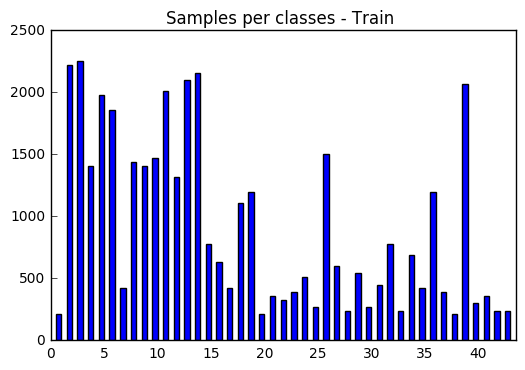

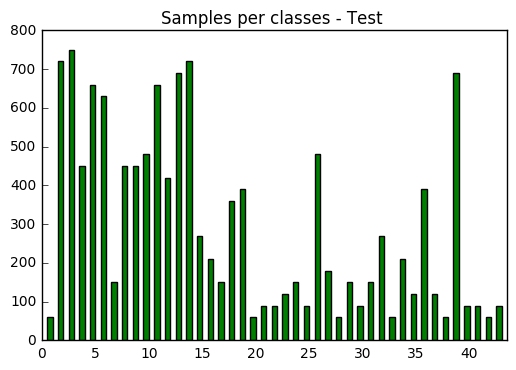

In [20]:

#Count samples in each set
count_train = np.zeros(n_classes)
count_test = np.zeros(n_classes)
count_labels =np.zeros(n_classes)

for i in range(n_classes):
    count_labels[i]=i    
    
for i in range(n_train):
    idx = int(y_train[i])
    count_train[idx] +=1

for i in range(n_test):
    idx = int(y_test[i])
    count_test[idx] +=1

#print(count_train)
#print(count_test)

print("Plot of number of ocurrences per class")

from matplotlib.pyplot import *

labels = count_labels
data =   count_train 

xlocations = np.array(range(len(data)))+0.5
width = 0.5
#plt.subplot(1,2,1)
bar(xlocations, data, width=width)
xlim(0, xlocations[-1]+width*2)
title("Samples per classes - Train ")
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
plt.show()

#Min
#Max


#Print test
data =   count_test

xlocations = np.array(range(len(data)))+0.5
width = 0.5
#plt.subplot(1,2,2)
bar(xlocations, data, width=width, color ='g')

xlim(0, xlocations[-1]+width*2)
title("Samples per classes - Test ")
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()

show()

[ 26.  11.   6.]


/home/asgunzi/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:504: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


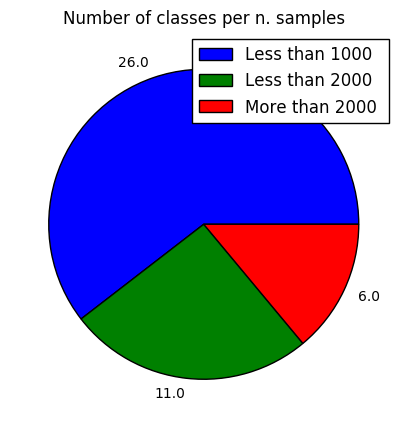

In [21]:
#Since there are classes with lots of samples and other with few samples, lets group the classes in three: less than 1000 samples, less than 2000 and greater than 2000

group_classes = np.zeros(3)
for i in range(n_classes):
    if count_train[i]<1000:
        group_classes[0]+=1
    elif count_train[i]<2000:
        group_classes[1]+=1
    else:
        group_classes[2]+=1
        

print(group_classes)

#Count upper and lower bounds of classes
limbounds = np.zeros([n_classes,2])

limbounds[0,0] =0
limbounds[0,1] =count_train[0]

for i in range(1,n_classes):
    limbounds[i,0] = limbounds[i-1,1]+1
    limbounds[i,1] = limbounds[i,0]+count_train[i]-1

    
pieVal =[]
arrLbl =  str(group_classes[0]),str(group_classes[1]),str(group_classes[2])
arrLgd = 'Less than 1000','Less than 2000', 'More than 2000 '

plt.rcParams["figure.figsize"] = (5,5)
title("Number of classes per n. samples")
patches = plt.pie(group_classes, labels = arrLbl)
plt.legend(patches, labels=arrLgd, loc="upper right")

Image of every class


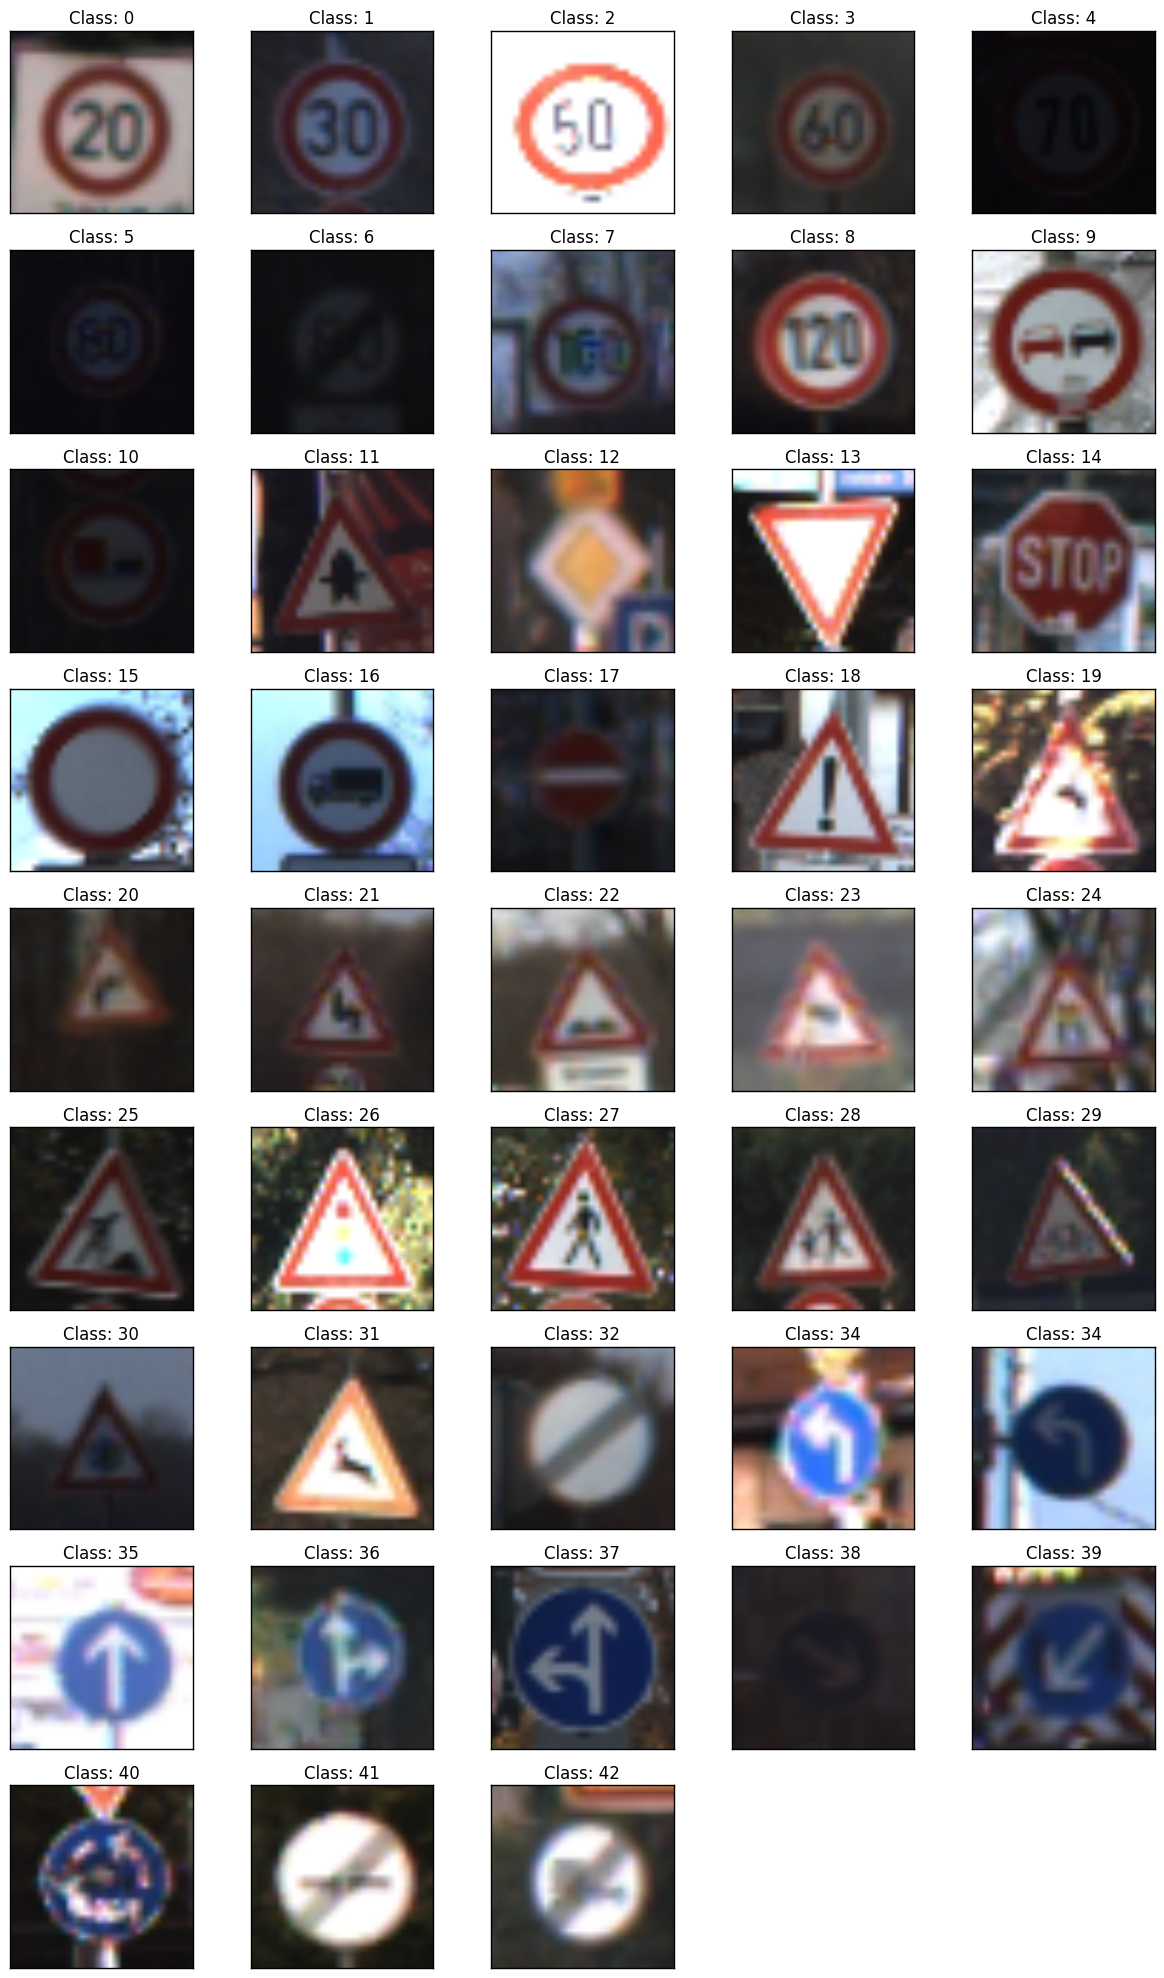

In [23]:
c=0
print("Image of every class")
plt.figure(figsize=(15,25))
for i in range(9):
    for j in range(5):
        if c<43:
            plt.subplot(9,5,c+1)
            index = random.randint(limbounds[c,0], limbounds[c,1])
            image = X_train[index].squeeze()
            plt.title('Class: ' + str(y_train[index]))
       
            fig =plt.imshow(image)
        
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            c+=1

<h3>Comment:</h3>

There are a lot of classes subsampled, while other have a lot of samples. I'm going to add more train values on the subsampled classes.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
### Preprocess the data here.
import cv2
#Gray scale
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    #return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Definition of gray function
def F_gray(X_Arr):
    X_out = np.zeros((len(X_Arr),32,32,1))
    #X_out = np.zeros_like(X_Arr)
    for i in range(len(X_Arr)):
        img = X_Arr[i].squeeze()
        X_out[i,:,:,0] = grayscale(img)
    return X_out



We're going to include some warped images in the training model.
It includes translation of at most 2 pixels, rotation of at most 15 degrees and a small warp perspective, using opencv functions.

Example:


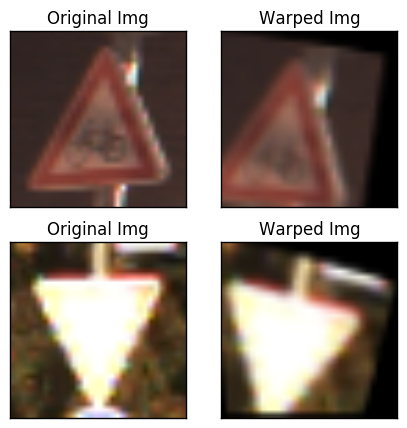

In [25]:
#warp

#Distortion function
def F_distort(X_Arr):
    X_out = np.zeros_like(X_Arr)
    for i in range(len(X_Arr)):
        #Parameters
        angle = (15*2*(np.random.rand()-.5)) #From -15 to 15 degrees
        Transl_x = 2*2*(np.random.rand()-.5) #From -2 to 2 pixels
        Transl_y = 2*2*(np.random.rand()-.5) #From -2 to 2 pixels

        img = X_Arr[i]
        M = cv2.getRotationMatrix2D((16,16),angle,1)
        M[0,2] = Transl_x
        M[1,2] = Transl_y

        #X_out[i,:,:,:] = cv2.warpAffine(img,M,(32,32))	
        
        imgswap = cv2.warpAffine(img,M,(32,32))
    
        #Perspective Transformation
        d1 = 2*(np.random.rand()-.5)
        d2 = 2*(np.random.rand()-.5)

        pts1 = np.float32([[2,2],[30,2],[0,30],[30,30]])
        pts2 = np.float32([[d1,d2],[30+d1,d2],[d1,30+d2],[30+d1,30+d2]])
        #pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        
        X_out[i,:,:,:] = cv2.warpPerspective(imgswap,M,(32,32))

    return X_out


X2 = F_distort(X_train)

print("We're going to include some warped images in the training model.")
print("It includes translation of at most 2 pixels, rotation of at most 15 degrees and a small warp perspective, using opencv functions.")

print()
print("Example:")

idx1 = random.randint(0, len(X_train))
plt.subplot(2,2,1)
fig =plt.title('Original Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.imshow(X_train[idx1].squeeze())

plt.subplot(2,2,2)
fig =plt.title('Warped Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
plt.imshow(X2[idx1].squeeze())



idx2 = random.randint(0, len(X_train))
plt.subplot(2,2,3)
fig =plt.title('Original Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.imshow(X_train[idx2].squeeze())

plt.subplot(2,2,4)
fig =plt.title('Warped Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.imshow(X2[idx2].squeeze())


More examples


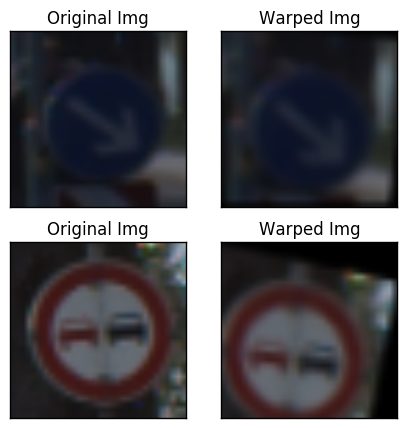

In [27]:
print("More examples")
idx1 = random.randint(0, len(X_train))
plt.subplot(2,2,1)
fig =plt.title('Original Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.imshow(X_train[idx1].squeeze())

plt.subplot(2,2,2)
fig =plt.title('Warped Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
plt.imshow(X2[idx1].squeeze())


idx2 = random.randint(0, len(X_train))
plt.subplot(2,2,3)
fig =plt.title('Original Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.imshow(X_train[idx2].squeeze())

plt.subplot(2,2,4)
fig =plt.title('Warped Img')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.imshow(X2[idx2].squeeze())

In [28]:
#Inclusion of warped images
print("The number of warped images to be included in the train data is inversily proportional to the number of samples:")
print("  Sets with less than 1000 samples will have 200% increase")
print("  Sets with less than 2000 samples will have 100% increase")
print("  Sets with greater than 2000 samples will have 50% increase")

#Distort
X_out = X_train
y_out = y_train

print("X_train.shape original: ", X_train.shape)
print("y_train.shape original: ", y_train.shape)

for n in range(n_classes): #For each class
    if count_train[n] <1000:
        #Add twice
        tini = int(limbounds[n,0])
        tend = int(limbounds[n,1])
        X_swap =  X_train[tini:tend,:,:,:]
        y_d1 = y_train[tini:tend]
        y_d2 = y_train[tini:tend]
        
        #Transformation
        X_d1 = F_distort(X_swap)
        X_d2 = F_distort(X_swap)
        
        X_out = np.concatenate([X_out,X_d1,X_d2])
        y_out = np.concatenate([y_out,y_d1,y_d2])
        
    elif count_train[n] <2000:
        tini = int(limbounds[n,0])
        tend = int(limbounds[n,1])
        X_swap =  X_train[tini:tend,:,:,:]
        y_d1 = y_train[tini:tend]

        #Transformation
        X_d1 = F_distort(X_swap)
        X_out = np.concatenate([X_out,X_d1])
        y_out = np.concatenate([y_out,y_d1])
        
    else:
        tini = int(limbounds[n,0])
        tend = int((limbounds[n,1]+ limbounds[n,0])/2)
        X_swap =  X_train[tini:tend,:,:,:]
        y_d1 = y_train[tini:tend]

        #Transformation
        X_d1 = F_distort(X_swap)
        X_out = np.concatenate([X_out,X_d1])
        y_out = np.concatenate([y_out,y_d1])

#Transform in gray
X_train_gray = F_gray(X_out)
X_test_gray = F_gray(X_test)


#Normalize images to [0,1]
X_train_norm= X_train_gray/255
X_test_norm= X_test_gray/255


#Shuffle 
from sklearn.utils import shuffle

X_train_shuff, y_train_shuff = shuffle(X_train_norm, y_out)
X_test_shuff, y_test_shuff = shuffle (X_test_norm, y_test)


#split  training/validation/
n_train=len(X_train_shuff)
limRange = int(n_train*0.8)

X_train_ini = (X_train_shuff[0:limRange+1])
X_valid_ini = (X_train_shuff[limRange+1:n_train+1])
#X_train_ini = F_gray(X_train[0:limRange+1])
#X_valid_ini = F_gray(X_train[limRange+1:n_train+1])

y_train_ini = y_train_shuff[0:limRange+1]
y_valid_ini = y_train_shuff[limRange+1:n_train+1]
    
print("X_train_ini.shape ", X_train_ini.shape)
print("X_valid_ini.shape ",X_valid_ini.shape)

print("y_train_ini.shape ", y_train_ini.shape)
print("y_valid_ini.shape ",y_valid_ini.shape)



The number of warped images to be included in the train data is inversily proportional to the number of samples:
  Sets with less than 1000 samples will have 200% increase
  Sets with less than 2000 samples will have 100% increase
  Sets with greater than 2000 samples will have 50% increase
X_train.shape original:  (39209, 32, 32, 3)
y_train.shape original:  (39209,)
X_train_ini.shape  (65957, 32, 32, 1)
X_valid_ini.shape  (16488, 32, 32, 1)
y_train_ini.shape  (65957,)
y_valid_ini.shape  (16488,)


Grayscale image visualization:


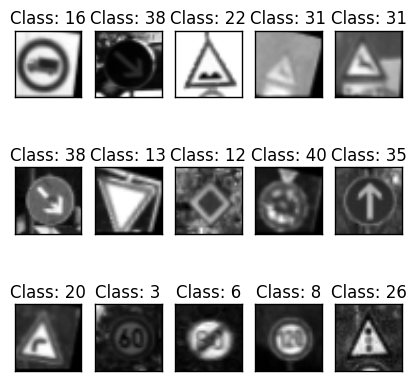

In [29]:
#Visualizing grayscale of images

print("Grayscale image visualization:")
nlins = 3
ncols=5
c=0
for i in range(nlins):
    for j in range(ncols):
        c+=1
        plt.subplot(nlins,ncols,c)
        index = random.randint(0, len(X_train_gray))
        image = X_train_gray[index].squeeze()
        plt.title('Class: ' + str(y_out[index]))
        fig =plt.imshow(image,cmap='gray')
        
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?


**Answer:**

<h2>Pre-processing of data</h2>

I did a counting of the number of samples per class. There are classes with a lot of samples, others with few ones, according to previous charts.

From the 43 classes, 
 26 have less than 1000 samples
 11 have more equal than 1000 samples and less than 2000
 6  have more than 2000 samples.

I plotted some random samples to visualize images and the classes it belongs to. There are some difficult images, even for a human.

The train set was normalized from [0,255] to [0,1].

The train set was then shuffled randomly.

 

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

<h2> Answer: Training, validation and testing</h2>
<h3> I divided the original train data into two sets:</h3>
<ul>
<li> train (80%)</li>
<li>validation (20%)</li>
</ul>



<h3> I added warped images to the original train (and validation) sets. The transformations were:</h3>
<ul>
    <li> Translation of at most 2 pixels</li>  
    <li> Rotation of at most 15 degrees</li> 
    <li> Small warp perspective (2 pixels of difference)</li> 
</ul>

<h3>The number of samples were greater when the samples were fewer.</h3>
<ul>
  <li> Sets with less than 1000 samples will have 200% increase</li> 
  <li> Sets with less than 2000 samples will have 100% increase</li> 
  <li> Sets with greater than 2000 samples will have 20% increase</li> 
</ul>  

<h3>Grayscale:</h3>
    I tested the neural net with and without grayscale, and with grayscale the accuracy was slighty better, and the time to run was very smaller (circa 40%) - details in the training session.
    The dataset with distorted images were more robust than without these data (difference between validation accuracy and test accuracy was smaller). The cost in time of processing with more data was greater (circa 40%).
    Some of these tips were from the LeCun paper in http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf.


In [30]:
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    #base =[6, 16]
    inflated=[20, 48]
   
    # Hyperparameters    
    mu = 0
    sigma = 0.1
    #Check
    #return x

    #======================================================================
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #w1 = tf.Variable(tf.truncated_normal([5,5,3,6], mean = mu, stddev = sigma))
    w1 = tf.Variable(tf.truncated_normal([5,5,1,inflated[0]], mean = mu, stddev = sigma))
    b1 = tf.Variable(tf.zeros(inflated[0]))
    
    l1_conv = tf.nn.conv2d(x, w1, strides = [1,1,1,1], padding= 'VALID', name = 'l1_conv')  +b1
    #l1_conv = tf.nn.bias_add(l1_conv, b1, name = 'l1_conv_bias')
    
    # TODO: Activation.
    #l1_act = tf.nn.relu(l1_conv, name = 'l1_act')
    l1_act = tf.nn.tanh(l1_conv, name = 'l1_act')
    
    #Check
    #return l1_act
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    l1_pool = tf.nn.max_pool(l1_act, [1,2,2,1],[1,2,2,1],'VALID', name = 'l1_pool')
    #Check
    #return l1_pool
    #l1_pool =tf.nn.dropout(l1_pool,.8)
    
    #======================================================================
    #TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    w2 = tf.Variable(tf.truncated_normal([5,5,inflated[0],inflated[1]], mean = mu, stddev = sigma))
    b2 = tf.Variable(tf.zeros(inflated[1]))
 
    l2_conv = tf.nn.conv2d(l1_pool, w2, strides = [1,1,1,1], padding = 'VALID', name = 'l2_conv')  
    l2_conv = tf.nn.bias_add(l2_conv, b2)
    #Check
    #return l2_conv

    # TODO: Activation.
    #l2_act = tf.nn.relu(l2_conv, name = 'l2_act')
    l2_act = tf.nn.tanh(l2_conv, name = 'l2_act')
    
    #Check
    #return l2_act

    #TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    l2_pool = tf.nn.max_pool(l2_act, [1,2,2,1],[1,2,2,1],'VALID', name = 'l2_pool')
    #Check
    #return l2_pool
    #l2_pool =tf.nn.dropout(l2_pool,.8)

    #===============================================================
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    nflat = int(5*5*inflated[1])
    x_flatten = tf.reshape(l2_pool, [-1,nflat], name = 'x_flatten')
    #Check
    #return x_flatten
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    w3 = tf.Variable(tf.truncated_normal([nflat,120], mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))
    
    # TODO: Activation.
    l3 = tf.add(tf.matmul(x_flatten,w3), b3, name = 'l3')
    #l3 = tf.nn.relu(l3)
    l3 = tf.nn.tanh(l3)
    #Check
    #return l3
    #l3 =tf.nn.dropout(l3,.8)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    w4 = tf.Variable(tf.truncated_normal([120,84], mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84))
    # TODO: Activation.
    l4 = tf.add(tf.matmul(l3, w4),b4, name = 'l4')
    #l4 = tf.nn.relu(l4)
    l4 = tf.nn.tanh(l4)
    #Check
    #return l4
    
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    w5 = tf.Variable(tf.truncated_normal([84,43], mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43))
    
    logits = tf.add(tf.matmul(l4, w5), b5, name = 'l5')
    
    
    return logits




### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
<h2> Architecture of solution</h2>

The final architecture is based on <b>LeNet</b> lab exercise. Feed forward neural networks, five layers. Two convolutional layers and 3 fully connected layers

<ul>
<li> Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.</li>
         Activation: tanh
         Pooling: Input = 28x28x20. Output = 14x14x20.
         
<li>Layer 2: Convolutional. Output = 10x10x48.</li>
         Activation: tanh
         Pooling: Input = 10x10x48. Output = 5x5x48.

<li>Flatten. Input = 5x5x48. Output = 1200.</li>

<li>Layer 3: Fully Connected. Input = 1200. Output = 120.</li>
         Activation: tanh
         
<li>Layer 4: Fully Connected. Input = 120. Output = 84.</li>
         Activation: tanh
         
<li>Layer 5: Fully Connected. Input = 84. Output = 43.</li>


<h2>Additional comments after project revision:</h2>

The baseline architecture used for this project was <b>LeNet</b>.

The first three layers are convolutional layers. It is a 2D filter because we're working with an image, two dimensions (and I used grayscale, to ignore the third dimension).
In my interpretation of how convolution works. It is like a filter sliding every position of the image. Because it is a linear filter, the resulting value will be greater when there is an exact match between the image and the filter weights, and value zero if not correlated at all. It is equivalent to try to find small features (or better, kernels) of the image. Try to find one piece of a puzzle per time: the eyes, nose, ears, hair, and so on.

The original LeCun paper even cites even that he used different sizes of the kernels. Using the analogy of the puzzle, one type of filter looked for greater pieces, and other, smaller pieces. 

The first layer extract these direct features, while second and third layers are levels of abstraction over the first layer. First I try to identify each piece of the puzzle, then group each piece of the puzzle to form a greater piece of the puzzle, then group these group of puzzles.

And finally, there is a transformation of this image in a single code of information, by Flatten layer. The dense layers can work as a usual neural network from now on.

Since there's no way to say beforehand the best architecture of the neural network (or at least, I do not know), the definition of metaparaters and architecture is mostly empirical: number of layers of each type, activation function, number of neurons in each layer. It is quite time-consuming, since there are a infinite combination. And also it is not good to overfit the network, since it will make wrong predictions.


In order to not spend valuable time and energy, it is a good strategy to begin with networks that are known to work in certain situations. In the case of this project, following advice of the lessons, LeNet was a good start point.

I studied Neural networks 10 years ago, in my Master's. But these advances (convolutional layers, dropout, LeNet, VGG, Tensor Flow, Keras) are very recent, and I'm very grateful to Udacity for teaching me all of this.





In [31]:
print(X_train_ini.shape)
print(y_train_ini.shape)

(65957, 32, 32, 1)
(65957,)


In [32]:

#EPOCHS = 50
EPOCHS = 25
BATCH_SIZE = 256
rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [16]:
from time import time
start_time = time()



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_ini)
    

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_tref, y_tref = shuffle(X_train_ini, y_train_ini)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_tref[offset:end], y_tref[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid_ini, y_valid_ini)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    print("Final Validation Accuracy = {:.3f}".format(validation_accuracy))
    saver.save(sess, 'lenet')
    print("Model saved")



end_time = time()
time_taken = end_time - start_time # time_taken is in seconds

hours, rest = divmod(time_taken,3600)
minutes, seconds = divmod(rest, 60)

print ("Time: ", hours, "h, ", minutes, "min, ", seconds, "s ")





NameError: name 'X_train_ini' is not defined

In [33]:

    
#Evaluation of test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_shuff, y_test_shuff)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.878


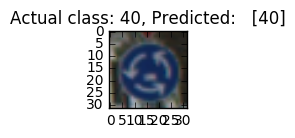

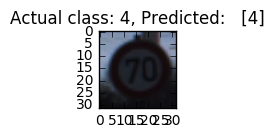

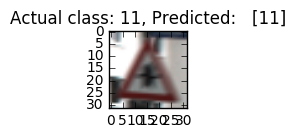

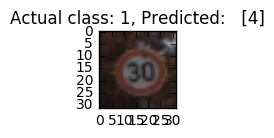

In [34]:
#Choose a random image from the test set and display results x nn forecast
#Single random evaluation:
def singleEval(X_single):
    with tf.Session() as sess:
        sess = tf.get_default_session()
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        choice = sess.run(tf.argmax(logits, 1), feed_dict={x: X_single})
        return choice
        


# Visualizations will be shown in the notebook.
%matplotlib inline

#Plot some random image to compare prediction with actual result
for i in range(4):
    index = random.randint(0, len(X_test))
    image =  X_test[index].squeeze()
    imgfeed = grayscale(X_test[index]).reshape([1,32,32,1])

    plt.figure(figsize=(1,1))
    predicted = singleEval(imgfeed)
    plt.title("Actual class: " + str(y_test[index]) + ", Predicted:   " + str(predicted))
    plt.imshow(image)

    

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
<h2>Epochs, optimizer, batch</h2>

<h3>Baseline</h3>
My baseline was exactly the same Lenet model in previous class laboratory. The only changes were on sizes of input and output.

There were some steps to evaluate the parameters, described below.

<h3>Step 1: Epochs</h3>
I did an evalution of some different epochs, resulting in:
 <table style="width:30%">
  <tr>
    <th>Name</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <td>EPOCHS</td>
    <td>5</td>
    <td>10</td>
    <td>15</td>
    <td>20</td>
    <td>25</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>0.910</td>
    <td>0.956</td>
    <td>0.969</td>
    <td>0.974</td>
    <td>0.969</td>
  </tr>
</table> 
There are improvement in validation till 20 - 25 Epochs.

For the rest of exercises, I kept the 25 epochs.
I kept the batch size of 256 from LeNet lab, because I had no memory problems.

<h3>Step 2: Optimizer</h3>
I tested three optimization functions: AdamOptimizer, Grad Descent, Momentum
Each of the tests were made varying the step among 5 values, according to tables. The Epoch was 25.

<h4>AdamOptimizer:</h4>

 <table style="width:30%">
  <tr>
    <th>Name</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <td>Step</td>
    <td>0.005</td>
    <td>0.01</td>
    <td>0.025</td>
    <td>0.04</td>
    <td>0.05</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>0.954</td>
    <td>0.978</td>
    <td>0.978</td>
    <td>0.981</td>
    <td>0.979</td>
  </tr>
  <tr>
    <td>Test</td>
    <td>0.875</td>
    <td>0.898</td>
    <td>0.899</td>
    <td>0.893</td>
    <td>0.902</td>
  </tr>
</table> 
The Adagrad is a very good choice.

<h4> Grad Descent:</h4>
 <table style="width:30%">
  <tr>
    <th>Name</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <td>Step</td>
    <td>0.005</td>
    <td>0.01</td>
    <td>0.025</td>
    <td>0.04</td>
    <td>0.05</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>0.066</td>
    <td>0.057</td>
    <td>0.055</td>
    <td>0.058</td>
    <td>0.063</td>
  </tr>
  <tr>
    <td>Test</td>
    <td>0.072</td>
    <td>0.065</td>
    <td>0.059</td>
    <td>0.062</td>
    <td>0.063</td>
  </tr>
</table> 

The Grad Descent didn't even converged to a reasonable value.

<h4>Momentum:</h4>

<table style="width:30%">
  <tr>
    <th>Name</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <td>Step</td>
    <td>0.005</td>
    <td>0.01</td>
    <td>0.025</td>
    <td>0.04</td>
    <td>0.05</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>0.695</td>
    <td>0.887</td>
    <td>0.890</td>
    <td>0.849</td>
    <td>0.861</td>
  </tr>
  <tr>
    <td>Test</td>
    <td>0.641</td>
    <td>0.802</td>
    <td>0.801</td>
    <td>0.750</td>
    <td>0.769</td>
  </tr>
</table> 

The momentum optimizer didn't performed well also. So, I kept the AdamOptimizer.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._


<h3>Step 3: Grayscale</h3>

I applied to grayscale to every training and test images.

There were only a small difference to baseline without grayscale. But, the processing time (since grayscales uses one layer instead of 3) was better. So, i kept the grayscale filter from now on.

<table style="width:30%">
  <tr>
    <th>Name</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <td>Step</td>
    <td>0.005</td>
    <td>0.01</td>
    <td>0.025</td>
    <td>0.04</td>
    <td>0.05</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>0.925</td>
    <td>0.973</td>
    <td>0.982</td>
    <td>0.979</td>
    <td>0.978</td>
  </tr>
  <tr>
    <td>Test</td>
    <td>0.844</td>
    <td>0.892</td>
    <td>0.903</td>
    <td>0.892</td>
    <td>0.896</td>
  </tr>
</table> 

<h3>Step 4: Dropout layer</h3>
I tried to insert one dropout layer (60%) after each convolutional layer. 
It performed worse than without dropout. Thinking well, the pooling layer does the function of dropout layer, so it doesn't make sense at all to have both pooling and dropout.


<h3>Step 5: Activation function</h3>
I tested three activation functions: relu, sigmoid and tanh.
The following are the results on <b>test accuracy</b>:
<table style="width:30%">
  <tr>
    <th>Name</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <td>Step</td>
    <td>0.005</td>
    <td>0.01</td>
    <td>0.025</td>
    <td>0.04</td>
    <td>0.05</td>
  </tr>
  <tr>
    <td>Relu</td>
    <td>0.844</td>
    <td>0.892</td>
    <td>0.903</td>
    <td>0.892</td>
    <td>0.896</td>
  </tr>
  <tr>
    <td>Sigmoid</td>
    <td>0.773</td>
    <td>0.834</td>
    <td>0.841</td>
    <td>0.836</td>
    <td>0.835</td>
  </tr>
   <tr>
    <td>TanH</td>
    <td>0.925</td>
    <td>0.920</td>
    <td>0.917</td>
    <td>0.923</td>
    <td>0.922</td>
  </tr>
</table> 

Since the TanH performed better, I used it as activation function.


<h3>Step 6: Wider Network</h3>


To try to reach bigger accuracy, i tested some wider Networks. Basically, I changed the number of neurons in the first two convolutional layers. 

The value on the table refers to the number of neurons on corresponding layer.
<table style="width:30%">
  <tr>
    <th>Name</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
  </tr>
  <tr>
    <td>Layer 1</td>
    <td>12</td>
    <td>20</td>
    <td>30</td>
    <td>40</td>
  </tr>
  <tr>
    <td>Layer 2</td>
    <td>32</td>
    <td>48</td>
    <td>60</td>
    <td>70</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>0.936</td>
    <td>0.925</td>
    <td>0.940</td>
    <td>0.942</td>
  </tr>
   <tr>
    <td>Test</td>
    <td>0.915</td>
    <td>0.919</td>
    <td>0.936</td>
    <td>0.934</td>
  </tr>
</table> 

The layer with 30 and 60 neurons (case 3 above) was the best one. And it's Test acuracy is of 93,4%.




<h3>Summary</h3>
I started from LeNet. I tested and discarded dropout layer, used grayscale, and tanH as activation function. Epochs = 25 in the final evaluation. Final step = 0.001, batch = 256.

And a wider neural network with 30 and 60 neurons in convolutional layers 1 and 2.

The final model had validation accuracy of 96,0% and test accuracy of 92,6%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

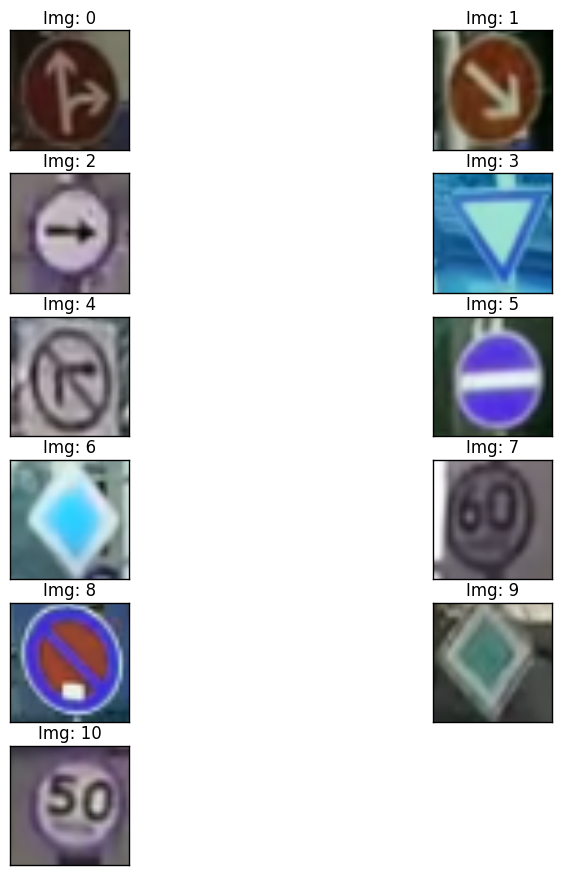

In [35]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np 

#Load and Resize images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img2=cv2.resize(img,(32,32)) #Resize

        if img2 is not None:
            images.append(img2)
    return images

imgScreenshots = load_images_from_folder('/home/asgunzi/CarND-Traffic-Sign-Classifier-Project/TrafficImages')

plt.figure(figsize=(10,20))
for i in range(len(imgScreenshots)):
    plt.subplot(len(imgScreenshots),2,i+1)
    
    image = imgScreenshots[i].squeeze()
    plt.title('Img: ' +str(i))
    fig =plt.imshow(image)

    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

<h3>Comment:</h3>
Img2, Img4, Img7 and Img10 are from Brazil. 

Other images are from German dashcam, screenshots from Youtube videos.

Based on a visual classification the list of classes for each image are:
(36, 38, 33, 13, 33, 17, 12, 3, 32, 12, 2, 5)

Img2 means "turn right". But it is not exactly equal to the German signal.
Img3 means "forbidden to turn right". There is no equivalent in the 43 classes. The most resemblance is in class 33, "turn right".



In [36]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

y_screenshots =[36, 38, 33, 13, 33, 17, 12, 3, 32, 12, 2, 5]
y_pred =np.zeros(len(imgScreenshots))
imgGray =np.zeros([1,32,32,1])

for i in range(len(imgScreenshots)):    
    image = imgScreenshots[i].squeeze()
    imgGray[0,:,:,0] =grayscale(image)
    #imgGray = grayscale(image)
    y_pred[i] = singleEval(imgGray)

print(y_pred)

[ 40.  38.   9.  13.   1.  17.  40.   2.  38.  12.   2.]


In [37]:
y_screenshots =[36, 38, 33, 13, 33, 17, 12, 3, 32, 12, 2, 5]
print("Actual class:", y_screenshots)
print("Prediction:", y_pred)

Actual class: [36, 38, 33, 13, 33, 17, 12, 3, 32, 12, 2, 5]
Prediction: [ 40.  38.   9.  13.   1.  17.  40.   2.  38.  12.   2.]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The accuracy was 4 of 11 samples.
As expected, the Brazilian signs were the more difficult. From the 4 samples, the model misrecognized the 4.

From the 7 other samples, it recognized correctly 4 of them.



In [42]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def EvalProb(X_single,k):
    with tf.Session() as sess:
        sess = tf.get_default_session()
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        choice = sess.run(tf.nn.top_k(logits,k), feed_dict={x: X_single})
        return choice



In [43]:
imgGray =np.zeros([1,32,32,1])
y_prob=[]

for i in range(len(imgScreenshots)):    
    image = imgScreenshots[i].squeeze()
    imgGray[0,:,:,0] =grayscale(image)
    y_prob.append(EvalProb(imgGray,3).indices)

print(y_prob)

[array([[40, 36,  4]], dtype=int32), array([[38,  2, 13]], dtype=int32), array([[ 9, 36, 12]], dtype=int32), array([[13, 38,  1]], dtype=int32), array([[ 1, 36,  4]], dtype=int32), array([[17, 14, 37]], dtype=int32), array([[40, 12, 34]], dtype=int32), array([[ 2, 40,  1]], dtype=int32), array([[38,  2,  5]], dtype=int32), array([[12, 38, 13]], dtype=int32), array([[ 2, 14,  0]], dtype=int32)]


In [44]:
print ("Img  ", "Top_k        ", "Actual")
for i in range(len(imgScreenshots)):
    print(i, " ", y_prob[i], "    ", y_screenshots[i])

Img   Top_k         Actual
0   [[40 36  4]]      36
1   [[38  2 13]]      38
2   [[ 9 36 12]]      33
3   [[13 38  1]]      13
4   [[ 1 36  4]]      33
5   [[17 14 37]]      17
6   [[40 12 34]]      12
7   [[ 2 40  1]]      3
8   [[38  2  5]]      32
9   [[12 38 13]]      12
10   [[ 2 14  0]]      2


Plot of probabilities


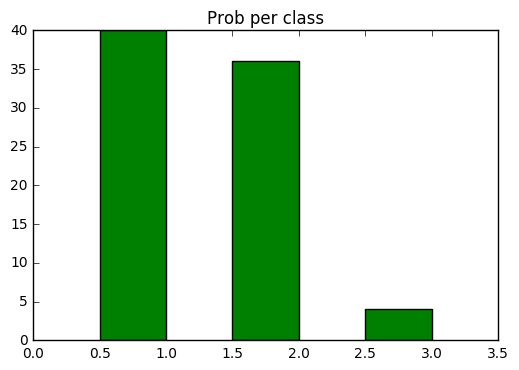

In [64]:
print("Plot of probabilities")
xlocations = np.array(range(3))+0.5
width = 0.5
#plt.subplot(1,2,2)

#print(xlocations.shape)
#print(y_prob[0][0].shape)

bar(xlocations, y_prob[0][0], width=width, color ='g')
xlim(0, xlocations[-1]+width*2)
title("Prob per class")
#gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
show()

**Answer:**

Only one sample more was predicted accurately. All the samples from Brazilian signals were not recognized, showing it needs a specific training on these signals.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.